# Notebook Roadmap

## Import Packages

In [60]:
!pip install wordcloud
!pip install gtts
!pip install playsound
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import tensorflow as tf
import keras
from tensorflow.data import Dataset
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image
from tqdm import tqdm
#TQDM for progress bars.
import glob
from gtts import gTTS
from playsound import playsound
from IPython import display
import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS

## Basic Visualizations and Operations

In [61]:
images='/kaggle/input/flickr8k/Images'
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  import sys


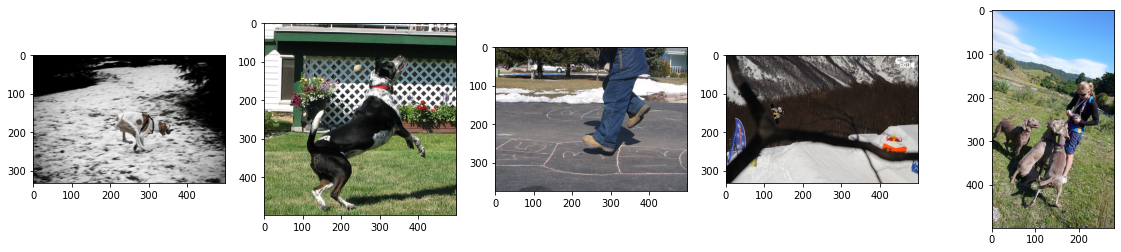

In [62]:
import imageio
#Visualising first 5 images :
Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)

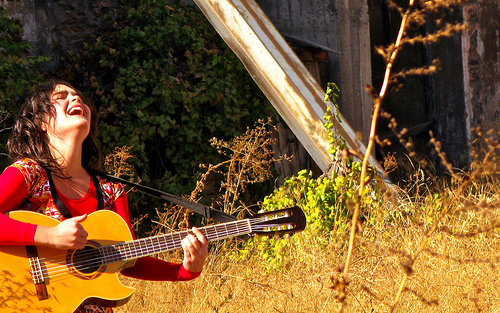

In [63]:
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])# view a random image

Stores the data in a Pandas DataFrame with three columns: 'ID', 'Path', and 'Captions'. 
The resulting DataFrame lists each image's ID, its full path, and its associated caption.

In [64]:
img_path = '/kaggle/input/flickr8k/Images/'

all_img_id = [] 
all_img_vector = [] 
captions = [] 

with open('/kaggle/input/flickr8k/captions.txt' , 'r') as fo:
  next(fo) 
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    captions.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,captions)),columns =['ID','Path', 'Captions']) 
    
df

ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                    Path  \
0      /kaggle/input/flickr8k/Images/1000268201_693b0...   
1      /kaggle/input/flickr8k/Images/1000268201_693b0...   
2      /kaggle/input/flickr8k/Images/1000268201_693b0...   
3      /kaggle/input/flickr8k/Images/1000268201_693b0...   
4      /kaggle/input/flickr8k/Images/1000268201_693b0...   
...                                                  ...   
40450  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40451  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40452  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40453  /kaggle/input/flickr8k/Images/997722733_0cb543...   
40454  /kaggle/input/flickr8k/Images/997722733_0cb543...   

                                                Captions  
0      A child in a pink dress is climbing up a set o...  
1                   A girl going into a wooden building   
2        A little girl climbing into a wooden playhouse   
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451            A man is rock climbing high in the air   
40452  A person in a red shirt climbing up a rock fac...  
40453                     A rock climber in a red shirt   
40454  A rock climber practices on a rock climbing wall   

[40455 rows x 3 columns]

In [65]:
print(len(captions))
print(len(all_imgs))

40455
8091


## Caption Pre-Processing

Counts the occurence of each word.

In [66]:
vocabulary = [word.lower() for line in captions for word in line.split()]
val_count = Counter(vocabulary) 
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

Extracting the top 30 most frequent words

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Count')

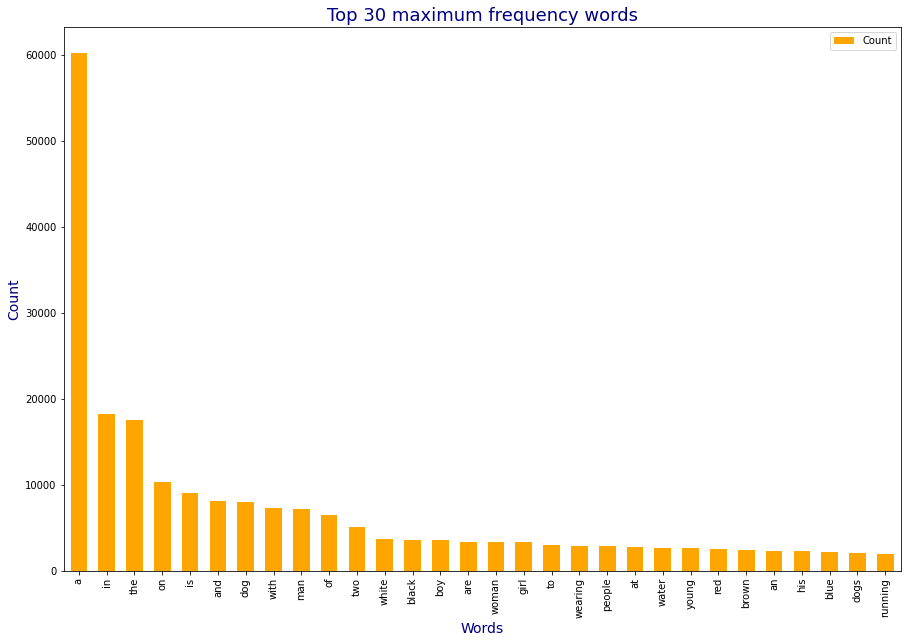

In [67]:
for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')

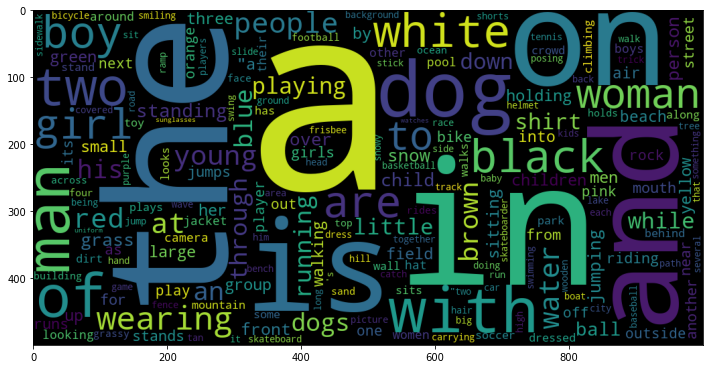

In [68]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

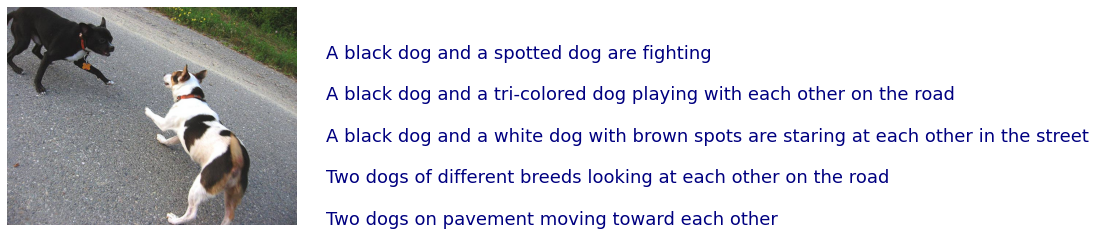

In [69]:
def caption_with_img_plot(image_id, frame) :
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[5], df)

- Converting all captions into a similar format.
- Stripping out punctuations, converting them to lowercase and removing numeric data

In [70]:
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(captions)) :
  line = captions[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  captions[r] = ' '.join(line)

In [71]:
#add the <start> & <end> token to all those captions as well
captions = ['<start>' + ' ' + line + ' ' + '<end>' for line in captions]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [72]:
captions[5:10]

['<start> black dog and spotted dog are fighting <end>',
 '<start> black dog and tricolored dog playing with each other on the road <end>',
 '<start> black dog and white dog with brown spots are staring at each other in the street <end>',
 '<start> two dogs of different breeds looking at each other on the road <end>',
 '<start> two dogs on pavement moving toward each other <end>']

Intializing a TensorFlow tokenizer to process image captions, setting a vocabulary size of 5000 words plus an out-of-vocabulary token ('UNK'). It filters specific characters, converts text to lowercase, and tokenizes at the word level. The tokenizer is then fitted on the captions, converting them into sequences of integers. Additionally, a special padding token ('PAD') is added to the tokenizer with an index of 0. Finally, it prints the OOV token ('UNK') and the padding token ('PAD')

In [73]:
top_word_cnt = 5000

tokenizer= tf.keras.preprocessing.text.Tokenizer(
    num_words = top_word_cnt+1, 
    filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
    lower = True, 
    char_level = False, 
    oov_token = 'UNK'
)
tokenizer.fit_on_texts(captions)
train_seqs = tokenizer.texts_to_sequences(captions)
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'


In [74]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [75]:
tokenizer_top_words = [word for line in captions for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)


<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553
brown :  2471
an :  2358
his :  2255
blue :  2125
dogs :  2097


Text(0, 0.5, 'Counts')

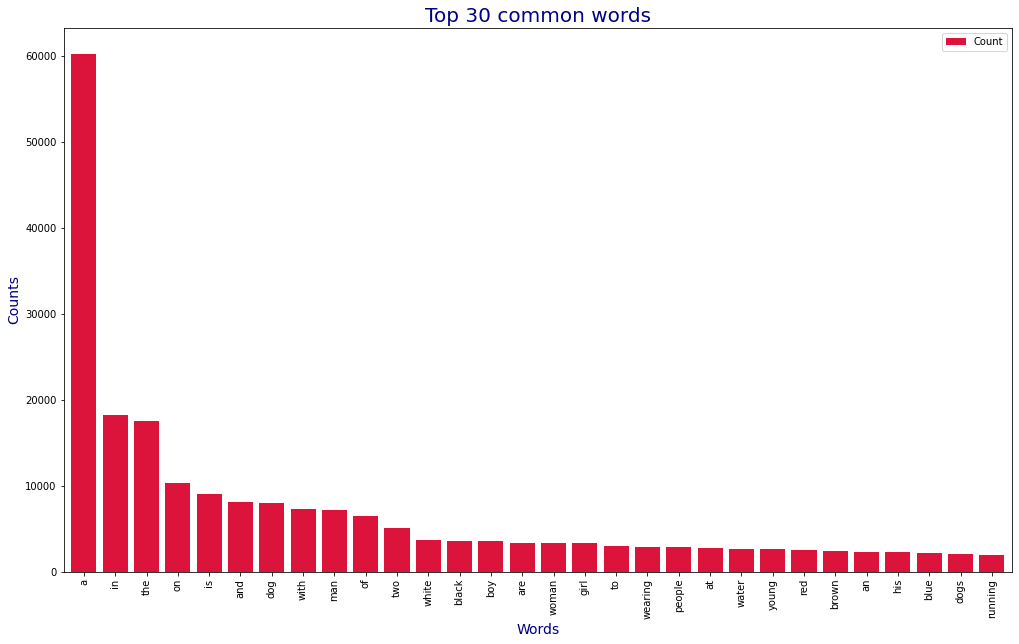

In [76]:
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'crimson', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')

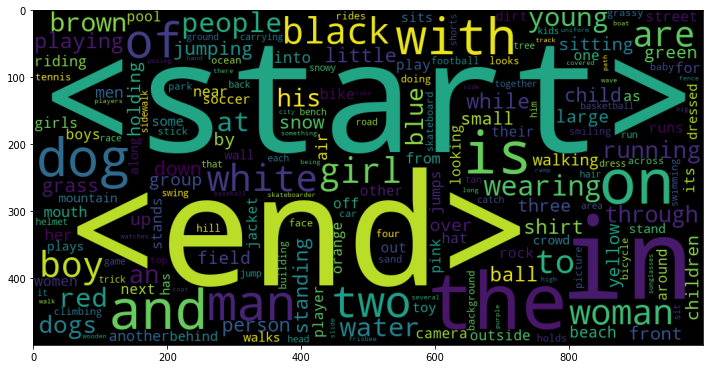

In [77]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)

Converts the list of captions into sequences of integers using the tokenizer's word index. Each word in a caption is replaced by its corresponding integer index from the tokenizer's vocabulary. Words not found in the vocabulary are replaced by the out-of-vocabulary token ('UNK').It then calculates the lengths of the tokenized caption sequences and identifies the longest sequence. It then pads all sequences to match this length, ensuring uniformity by adding zeros at the end of each sequence.

In [78]:
train_seqs = tokenizer.texts_to_sequences(captions)
train_seqs_len = [len(seq) for seq in train_seqs]

longest_word_length = max(train_seqs_len)

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


# Image Pre-Processing

Images are Pre-Processed using Inceptionv3 Model

In [79]:
preprocessed_image = []
IMAGE_SHAPE = (299, 299)
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    preprocessed_image.append(img)

Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


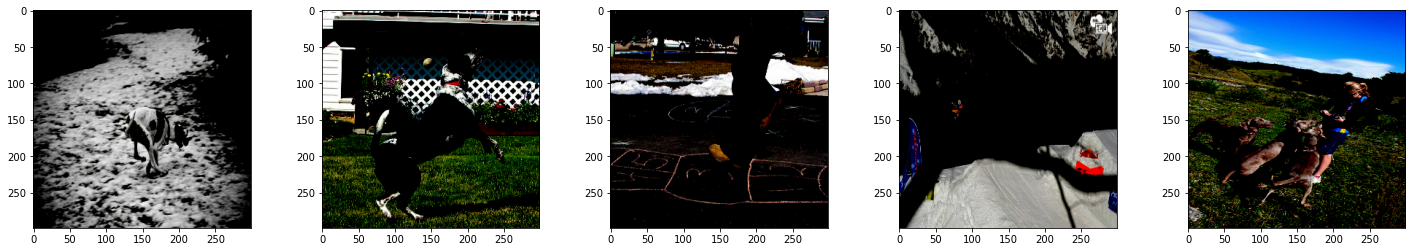

In [80]:
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)
for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)


In [81]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

Setting up a pipeline to prepare image data for training using TensorFlow.

In [82]:
training_list = sorted(set(all_img_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)

Splitting the Images and their corresponding Captions into Train-Test

In [83]:
path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [84]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


## Feature Extraction

Inceptionv3 Model is used for Feature Extraction

In [85]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input 
hidden_layer = image_model.layers[-1].output  
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

1. **Extracting Image Features**:
    - The code initializes an empty dictionary `img_features` to store image features extracted from a pre-trained model.
    - It iterates over batches of images and their respective paths from `New_Img`, where `New_Img` is a TensorFlow dataset containing image paths.
    - For each batch, it uses `image_features_extract_model` to extract features from the images. These features are then flattened and stored in `img_features` with their corresponding image paths as keys.

2. **Mapping Function**:
    - The `map` function is defined to retrieve image features based on the image name and return them alongside captions. It accesses `img_features` using the image name to fetch the corresponding features and pairs them with captions.

3. **Creating the TensorFlow Dataset**:
    - `BUFFER_SIZE = 1000` and `BATCH_SIZE = 64` are defined for dataset operations. 
    - `gen_dataset` function constructs a TensorFlow dataset (`data`) from tensors of image paths (`img`) and captions (`capt`).
    - It maps a lambda function to each element in the dataset to call the `map` function and apply it to `ele1` and `ele2`.
    - `data` is shuffled with a buffer size of `BUFFER_SIZE`, batches with `BATCH_SIZE`, and prefetches batches to optimize performance with `tf.data.experimental.AUTOTUNE`.
  

In [86]:
# extract features from each image in the dataset
BUFFER_SIZE = 1000
BATCH_SIZE = 64
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  for batch_feat, path in zip(batch_features_flattened, image_path):
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()
    
    
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption


def gen_dataset(img, capt):
        
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data

100%|██████████| 127/127 [00:26<00:00,  4.80it/s]


Preparing Datasets with Features and Captions of the image

In [87]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [88]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 31)


## Setting Up Parameters

In [89]:
embedding_dim = 256 
units = 512
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE  
max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

## Seq2Seq Model Building 

- **Purpose**: The `Encoder` class processes image features.
- **Initialization (`__init__`)**:
  - `self.dense = tf.keras.layers.Dense(embed_dim)`: Initializes a dense layer to extract features from the input.
- **Call Method (`call`)**:
  - `features`: Input tensor representing image features.
  - `self.dense(features)`: Computes the feature extraction operation.
  - `tf.keras.activations.relu(features, max_value=None, threshold=0)`: Applies ReLU activation to the extracted features.
  - **Return**: Returns the processed features.

In [90]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features,max_value=None, threshold=0)
        return features
encoder=Encoder(embedding_dim)

- **Purpose**: The `Attention_model` class implements an attention mechanism.
- **Initialization (`__init__`)**:
  - `self.W1`, `self.W2`, `self.V`: Dense layers for computing attention scores and weights.
  - `self.units`: Dimensionality of the attention mechanism.
- **Call Method (`call`)**:
  - `features`: Input tensor representing the image features.
  - `hidden`: Hidden state from the decoder GRU.
  - `hidden_with_time_axis`: Adjusts the shape of the hidden state for compatibility with the attention mechanism.
  - `score`: Computes attention scores using tanh activation on weighted sums of `features` and `hidden_with_time_axis`.
  - `attention_weights`: Computes attention weights by applying softmax activation to `score`.
  - `context_vector`: Computes the context vector by multiplying `attention_weights` with `features` and summing along the appropriate axis.
  - **Return**: Returns `context_vector` and `attention_weights`.

In [91]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

- **Purpose**: The `Decoder` class generates captions based on image features using an attention-based mechanism.
- **Initialization (`__init__`)**:
  - `self.attention`: Initializes an instance of `Attention_model` to handle attention.
  - `self.embed`: Embedding layer for converting word indices into dense vectors.
  - `self.gru`: GRU (Gated Recurrent Unit) layer for decoding captions.
  - `self.d1`, `self.d2`: Dense layers for generating output predictions.
- **Call Method (`call`)**:
  - `x`: Input tensor representing caption tokens.
  - `features`: Image features extracted by the encoder.
  - `hidden`: Initial hidden state from the decoder's `init_state`.
  - `context_vector`, `attention_weights`: Computes attention weights and context vector using the attention mechanism.
  - `embed`: Embeds input tokens and concatenates with the context vector.
  - `gru_output`, `state`: Computes GRU output and updates the hidden state.
  - `output`: Computes final predictions using dense layers.
  - **Return**: Returns `output`, `state`, and `attention_weights`.

In [92]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform',input_shape=(None, embed_dim + embed_dim))
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        gru_output = self.gru(embed)
        state=gru_output[1]
        output=gru_output[0]
         # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [93]:
decoder=Decoder(embedding_dim, units, vocab_size)

- **Purpose**: Integrates the encoder, attention model, and decoder to generate captions for images.
- **Execution**:
  - Initializes `decoder` with specified dimensions (`embedding_dim`, `units`, `vocab_size`).
  - Computes `features` from the encoder using `sample_img_batch`.
  - Initializes `hidden` state for the decoder.
  - Constructs initial decoder input (`dec_input`) using start token.
  - Generates `predictions`, `hidden_out`, and `attention_weights` by calling `decoder` with `dec_input`, `features`, and `hidden`.
  - Prints shapes of `features`, `predictions`, and `attention_weights` for validation.
  
  
It includes an `Encoder` to extract image features, an `Attention_model` to focus on relevant parts of the image, and `Decoder` that generates captions based on these features.

In [94]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Loss Function

In [95]:
optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE)

In [96]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    
    return tf.reduce_mean(loss_)

## Training and Testing Statistics

In [97]:
from tensorflow.keras.optimizers import Adam
checkpoint_path = "Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer =Adam(learning_rate=0.001))
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [98]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [99]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [100]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
            predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
            loss = loss + loss_function(target[:, r], predictions)
            dec_input = tf.expand_dims(target[: , r], 1)
        avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
        trainable_vars = encoder.trainable_variables + decoder.trainable_variables
        grad = tape.gradient (loss, trainable_vars) 
        optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [101]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss = total_loss + t_loss
        avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [102]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30
best_test_loss = float('inf')  # Initialize with a high value


for epoch in tqdm(range(EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss = total_loss / train_num_steps   
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1, avg_train_loss, test_loss))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    # Save model checkpoint if test loss improves
    if test_loss < best_test_loss:
        print('Test loss has been reduced from {:.3f} to {:.3f}'.format(best_test_loss, test_loss))
        best_test_loss = test_loss

  3%|▎         | 1/30 [02:44<1:19:21, 164.18s/it]

For epoch: 1, the train loss is 1.441, & test loss is 1.205
Time taken for 1 epoch 164.17339897155762 sec

Test loss has been reduced from inf to 1.205


  7%|▋         | 2/30 [03:51<50:04, 107.30s/it]  

For epoch: 2, the train loss is 1.114, & test loss is 1.062
Time taken for 1 epoch 67.4889624118805 sec

Test loss has been reduced from 1.205 to 1.062


 10%|█         | 3/30 [04:59<40:09, 89.25s/it] 

For epoch: 3, the train loss is 1.009, & test loss is 0.977
Time taken for 1 epoch 67.76781940460205 sec

Test loss has been reduced from 1.062 to 0.977


 13%|█▎        | 4/30 [06:06<34:56, 80.65s/it]

For epoch: 4, the train loss is 0.937, & test loss is 0.914
Time taken for 1 epoch 67.47019028663635 sec

Test loss has been reduced from 0.977 to 0.914


 17%|█▋        | 5/30 [07:14<31:36, 75.84s/it]

For epoch: 5, the train loss is 0.879, & test loss is 0.859
Time taken for 1 epoch 67.31346201896667 sec

Test loss has been reduced from 0.914 to 0.859


 20%|██        | 6/30 [08:21<29:09, 72.88s/it]

For epoch: 6, the train loss is 0.831, & test loss is 0.812
Time taken for 1 epoch 67.13264465332031 sec

Test loss has been reduced from 0.859 to 0.812


 23%|██▎       | 7/30 [09:28<27:13, 71.01s/it]

For epoch: 7, the train loss is 0.786, & test loss is 0.769
Time taken for 1 epoch 67.14590358734131 sec

Test loss has been reduced from 0.812 to 0.769


 27%|██▋       | 8/30 [10:35<25:32, 69.64s/it]

For epoch: 8, the train loss is 0.745, & test loss is 0.730
Time taken for 1 epoch 66.72299456596375 sec

Test loss has been reduced from 0.769 to 0.730


 30%|███       | 9/30 [11:41<24:01, 68.66s/it]

For epoch: 9, the train loss is 0.708, & test loss is 0.692
Time taken for 1 epoch 66.48291325569153 sec

Test loss has been reduced from 0.730 to 0.692


 33%|███▎      | 10/30 [12:48<22:38, 67.93s/it]

For epoch: 10, the train loss is 0.674, & test loss is 0.658
Time taken for 1 epoch 66.31574058532715 sec

Test loss has been reduced from 0.692 to 0.658


 37%|███▋      | 11/30 [13:54<21:25, 67.64s/it]

For epoch: 11, the train loss is 0.641, & test loss is 0.626
Time taken for 1 epoch 66.95629239082336 sec

Test loss has been reduced from 0.658 to 0.626


 40%|████      | 12/30 [15:01<20:13, 67.41s/it]

For epoch: 12, the train loss is 0.613, & test loss is 0.596
Time taken for 1 epoch 66.88831186294556 sec

Test loss has been reduced from 0.626 to 0.596


 43%|████▎     | 13/30 [16:08<19:02, 67.19s/it]

For epoch: 13, the train loss is 0.583, & test loss is 0.568
Time taken for 1 epoch 66.67274618148804 sec

Test loss has been reduced from 0.596 to 0.568


 47%|████▋     | 14/30 [17:15<17:53, 67.08s/it]

For epoch: 14, the train loss is 0.558, & test loss is 0.545
Time taken for 1 epoch 66.81843900680542 sec

Test loss has been reduced from 0.568 to 0.545


 50%|█████     | 15/30 [18:21<16:41, 66.78s/it]

For epoch: 15, the train loss is 0.533, & test loss is 0.520
Time taken for 1 epoch 66.09143042564392 sec

Test loss has been reduced from 0.545 to 0.520


 53%|█████▎    | 16/30 [19:28<15:35, 66.80s/it]

For epoch: 16, the train loss is 0.512, & test loss is 0.498
Time taken for 1 epoch 66.83395862579346 sec

Test loss has been reduced from 0.520 to 0.498


 57%|█████▋    | 17/30 [20:35<14:28, 66.84s/it]

For epoch: 17, the train loss is 0.490, & test loss is 0.476
Time taken for 1 epoch 66.94874930381775 sec

Test loss has been reduced from 0.498 to 0.476


 60%|██████    | 18/30 [21:41<13:21, 66.81s/it]

For epoch: 18, the train loss is 0.472, & test loss is 0.457
Time taken for 1 epoch 66.72317838668823 sec

Test loss has been reduced from 0.476 to 0.457


 63%|██████▎   | 19/30 [22:48<12:14, 66.81s/it]

For epoch: 19, the train loss is 0.455, & test loss is 0.438
Time taken for 1 epoch 66.81623268127441 sec

Test loss has been reduced from 0.457 to 0.438


 67%|██████▋   | 20/30 [23:55<11:06, 66.66s/it]

For epoch: 20, the train loss is 0.438, & test loss is 0.423
Time taken for 1 epoch 66.30852699279785 sec

Test loss has been reduced from 0.438 to 0.423


 70%|███████   | 21/30 [25:02<10:00, 66.75s/it]

For epoch: 21, the train loss is 0.423, & test loss is 0.409
Time taken for 1 epoch 66.96809458732605 sec

Test loss has been reduced from 0.423 to 0.409


 73%|███████▎  | 22/30 [26:08<08:53, 66.65s/it]

For epoch: 22, the train loss is 0.410, & test loss is 0.396
Time taken for 1 epoch 66.39704608917236 sec

Test loss has been reduced from 0.409 to 0.396


 77%|███████▋  | 23/30 [27:15<07:46, 66.71s/it]

For epoch: 23, the train loss is 0.396, & test loss is 0.378
Time taken for 1 epoch 66.85413455963135 sec

Test loss has been reduced from 0.396 to 0.378


 80%|████████  | 24/30 [28:21<06:39, 66.64s/it]

For epoch: 24, the train loss is 0.385, & test loss is 0.377
Time taken for 1 epoch 66.48192548751831 sec

Test loss has been reduced from 0.378 to 0.377


 83%|████████▎ | 25/30 [29:28<05:33, 66.63s/it]

For epoch: 25, the train loss is 0.373, & test loss is 0.358
Time taken for 1 epoch 66.60848140716553 sec

Test loss has been reduced from 0.377 to 0.358


 87%|████████▋ | 26/30 [30:35<04:26, 66.62s/it]

For epoch: 26, the train loss is 0.361, & test loss is 0.351
Time taken for 1 epoch 66.58953046798706 sec

Test loss has been reduced from 0.358 to 0.351


 90%|█████████ | 27/30 [31:41<03:20, 66.68s/it]

For epoch: 27, the train loss is 0.351, & test loss is 0.338
Time taken for 1 epoch 66.81095385551453 sec

Test loss has been reduced from 0.351 to 0.338


 93%|█████████▎| 28/30 [32:48<02:13, 66.74s/it]

For epoch: 28, the train loss is 0.343, & test loss is 0.334
Time taken for 1 epoch 66.87295866012573 sec

Test loss has been reduced from 0.338 to 0.334


 97%|█████████▋| 29/30 [33:55<01:06, 66.74s/it]

For epoch: 29, the train loss is 0.335, & test loss is 0.321
Time taken for 1 epoch 66.74133610725403 sec

Test loss has been reduced from 0.334 to 0.321


100%|██████████| 30/30 [35:02<00:00, 70.07s/it]

For epoch: 30, the train loss is 0.325, & test loss is 0.314
Time taken for 1 epoch 66.65900993347168 sec

Test loss has been reduced from 0.321 to 0.314


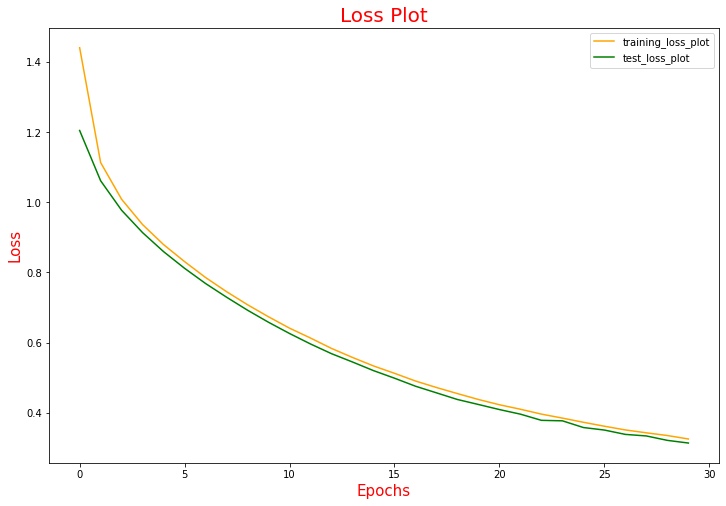

In [103]:
plt.figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()

In [104]:
def evaluate(image):
    attn_plot = np.zeros((max_length,attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_inp = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_inp) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        pred, hidden, attn_weights = decoder(dec_input, features, hidden) 

        attn_plot[i] = tf.reshape(attn_weights, (-1, )).numpy()

        pred_id = tf.argmax(pred[0]).numpy() 
        result.append (tokenizer.index_word[pred_id])

        if tokenizer.index_word[pred_id] == '<end>':
            return result, attn_plot, pred

        dec_input = tf.expand_dims([pred_id], 0)

    attn_plot = attn_plot[:len(result), :]
    return result, attention_plot, pred

## Attention-Map Visualizer

In [105]:
def plot_attn_map (caption, weights, img) :

    fig = plt.figure(figsize = (10, 10))
    temp_img = np.array(Image.open(img))

    cap_len = len(caption)
    for cap in range(cap_len) :
        weights_img_1 = np.reshape(weights[cap], (8, 8))
        weights_img_2 = np.array(Image.fromarray(weights_img_1).resize((224,224), Image.LANCZOS))

        ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
        ax.set_title(caption[cap], fontsize = 14, color = 'red')

        img = ax.imshow(temp_img)

        ax.imshow(weights_img_1, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [106]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [107]:
image_test=path_test.copy()

In [108]:
from nltk.translate.bleu_score import sentence_bleu

## GTTS-Service

In [109]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_img = image_test[rid]

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_img)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BLEU score: {score*100}")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attn_map(result, attention_plot, test_img)
    
    speech = gTTS(pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_img

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  if __name__ == "__main__":


BLEU score: 28.27294315565172
Real Caption: hip young woman down the street with woman in kimono walks behind her
Prediction Caption: hip young man in boots holds up in front of her


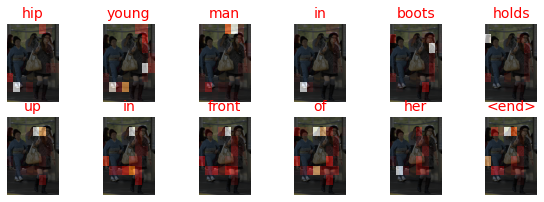

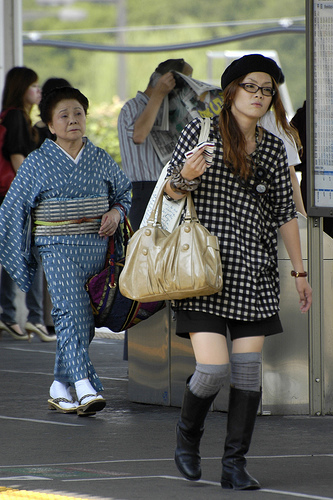

In [110]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 54.59428749052021
Real Caption: smiling boy with blue sweatshirt and camouflage shorts on metal slide in the grass
Prediction Caption: young boy in red shirt and camouflage shorts on metal slide


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  if __name__ == "__main__":


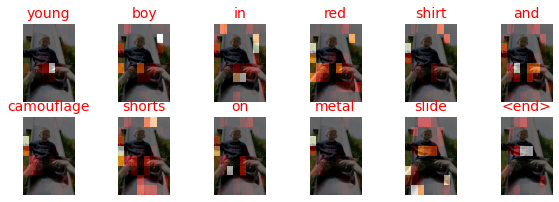

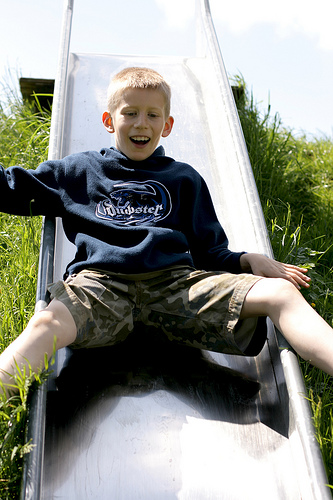

In [111]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

BLEU score: 1.8342815626580336e-76
Real Caption: group of police officers UNK the streets with building in the background
Prediction Caption: policemen are gathered around glass building


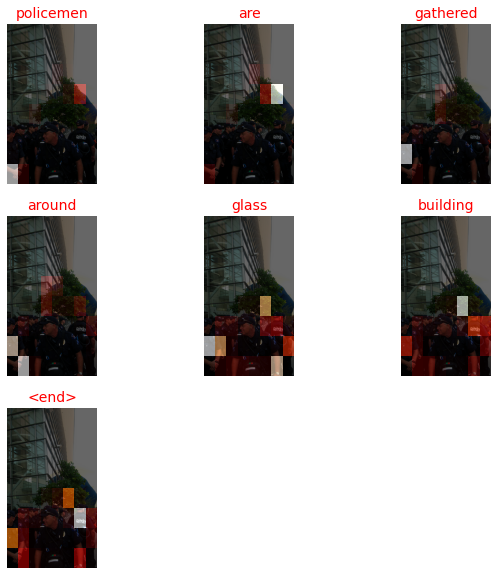

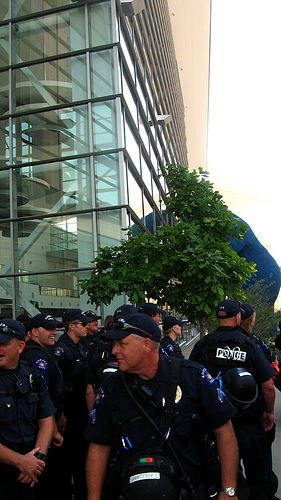

In [112]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  if __name__ == "__main__":


BLEU score: 54.96509142160036
Real Caption: one man in red shirt is falling
Prediction Caption: man in red is holding ball


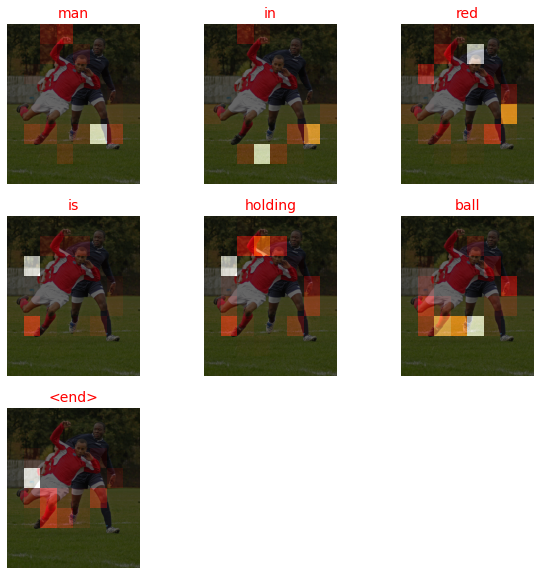

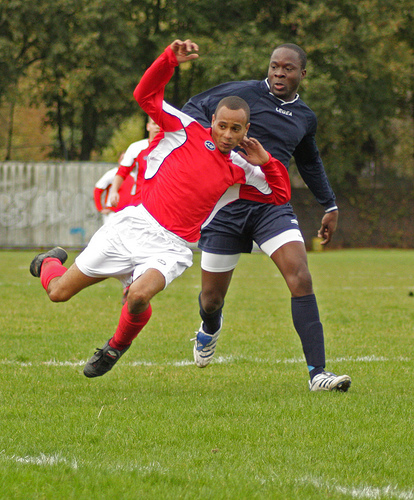

In [113]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

BLEU score: 1.8587294126174678e-76
Real Caption: little girl plays fetch with white dog
Prediction Caption: girl throws something


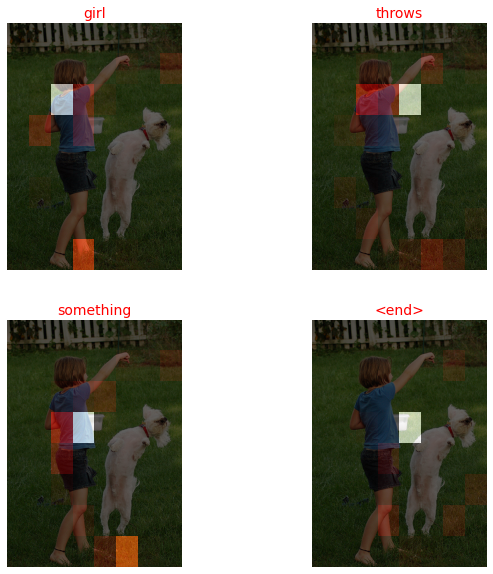

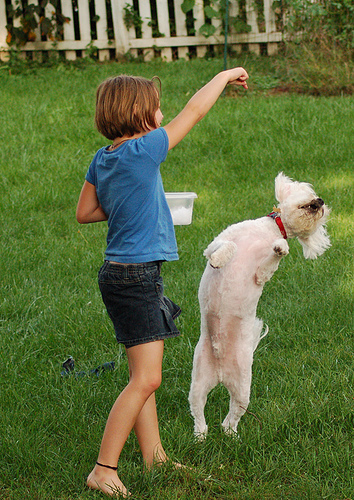

In [114]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 100.0
Real Caption: two women pose for picture in bedroom
Prediction Caption: two women pose for picture in bedroom


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  if __name__ == "__main__":


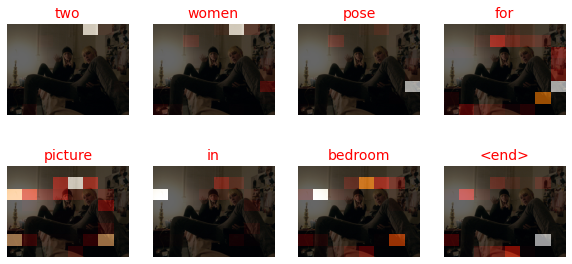

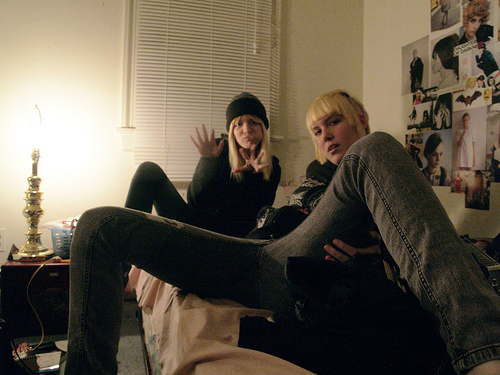

In [115]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)